## Model Building

### Model Evaluation Criterion

**Model can make two kinds of wrong predictions:**
1. Predicting that the customer will purchase a Travel Package when they don"t. - False Positive.
2. Predicting that the customer will not purchase a Travel Package when they do. - False Negative.

**The Travel company"s objectives are:**
1. Make Marketing Expenditure more efficient and focused on the customers that would actually purchase the product.
2. Predict and Identify all potential customers who will purchase Travel package

**Metric for Optimization:**

For the above objectives, its important that both False positive and False negative values are low. Hence we would want the F1-Score to be maximized. The greater the F1-Score, greater the chances of predicting both classes correctly.

**We will build following models, tune them and compare the outcome of all the models:**
1. Decision Tree model.
2. Bagging Classifier.
3. Random Forest Classifier.
4. ADABoost.
5. XG Boost.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("./data-after-transformation/train.csv", index_col=[0])
val = pd.read_csv("./data-after-transformation/val.csv", index_col=[0])

In [3]:
from sklearn import metrics

# libraries to build Linear Regression Model
from sklearn.linear_model import LogisticRegression

# libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# libraries to build ensemble models
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier, 
    GradientBoostingClassifier,
    StackingClassifier,
)

# libraries to build xgboost model
from xgboost import XGBClassifier

# library for stacking classifier
from sklearn.ensemble import StackingClassifier

# to tune different models
from sklearn.model_selection import GridSearchCV, train_test_split

# to get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    classification_report,
)

In [20]:
def get_metrics_score(model,flag=True):
    """
    model : classifier to predict values of X

    """
    # defining an empty list to store train and test results
    score_list=[] 
    
    # predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_val)
    
    # accuracy of the model
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_val,y_val)
    
    # recall of the model
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_val,pred_test)
    
    # precision of the model
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_val,pred_test)
    
    # f1_score of the model
    train_f1 = metrics.f1_score(y_train,pred_train)
    test_f1 = metrics.f1_score(y_val,pred_test)

    # populate the score_list 
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",train_acc)
        print("Accuracy on test set : ",test_acc)
        print("Recall on training set : ",train_recall)
        print("Recall on test set : ",test_recall)
        print("Precision on training set : ",train_precision)
        print("Precision on test set : ",test_precision)
        print("F1 on training set : ",train_f1)
        print("F1 on test set : ",test_f1)
    return score_list # returning the list with train and test scores

#### Decision Tree Classifier

In [4]:
X_train = train.drop(columns=["ProdTaken", "CustomerID"])
y_train = train["ProdTaken"]

X_val = val.drop(columns=["ProdTaken", "CustomerID"])
y_val = val["ProdTaken"]

In [5]:
y_train.isna().sum()

0

In [19]:
# DecistionTreeClassifier with gini and class_weight for appropriate importance
dtc = DecisionTreeClassifier(criterion="gini",class_weight={0:0.15,1:0.85},random_state=1)

# fit the model on training dataset
dtc.fit(X_train, y_train) 

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)

#### Check the scores

In [21]:
# check the scores on Training and Testing Datasets
dtc_score = get_metrics_score(dtc)

Accuracy on training set :  1.0
Accuracy on test set :  0.8299919807538091
Recall on training set :  1.0
Recall on test set :  0.5404255319148936
Precision on training set :  1.0
Precision on test set :  0.5497835497835498
F1 on training set :  1.0
F1 on test set :  0.5450643776824035


#### Visualise the tree

In [24]:
feature_names = X_train.columns.to_list()

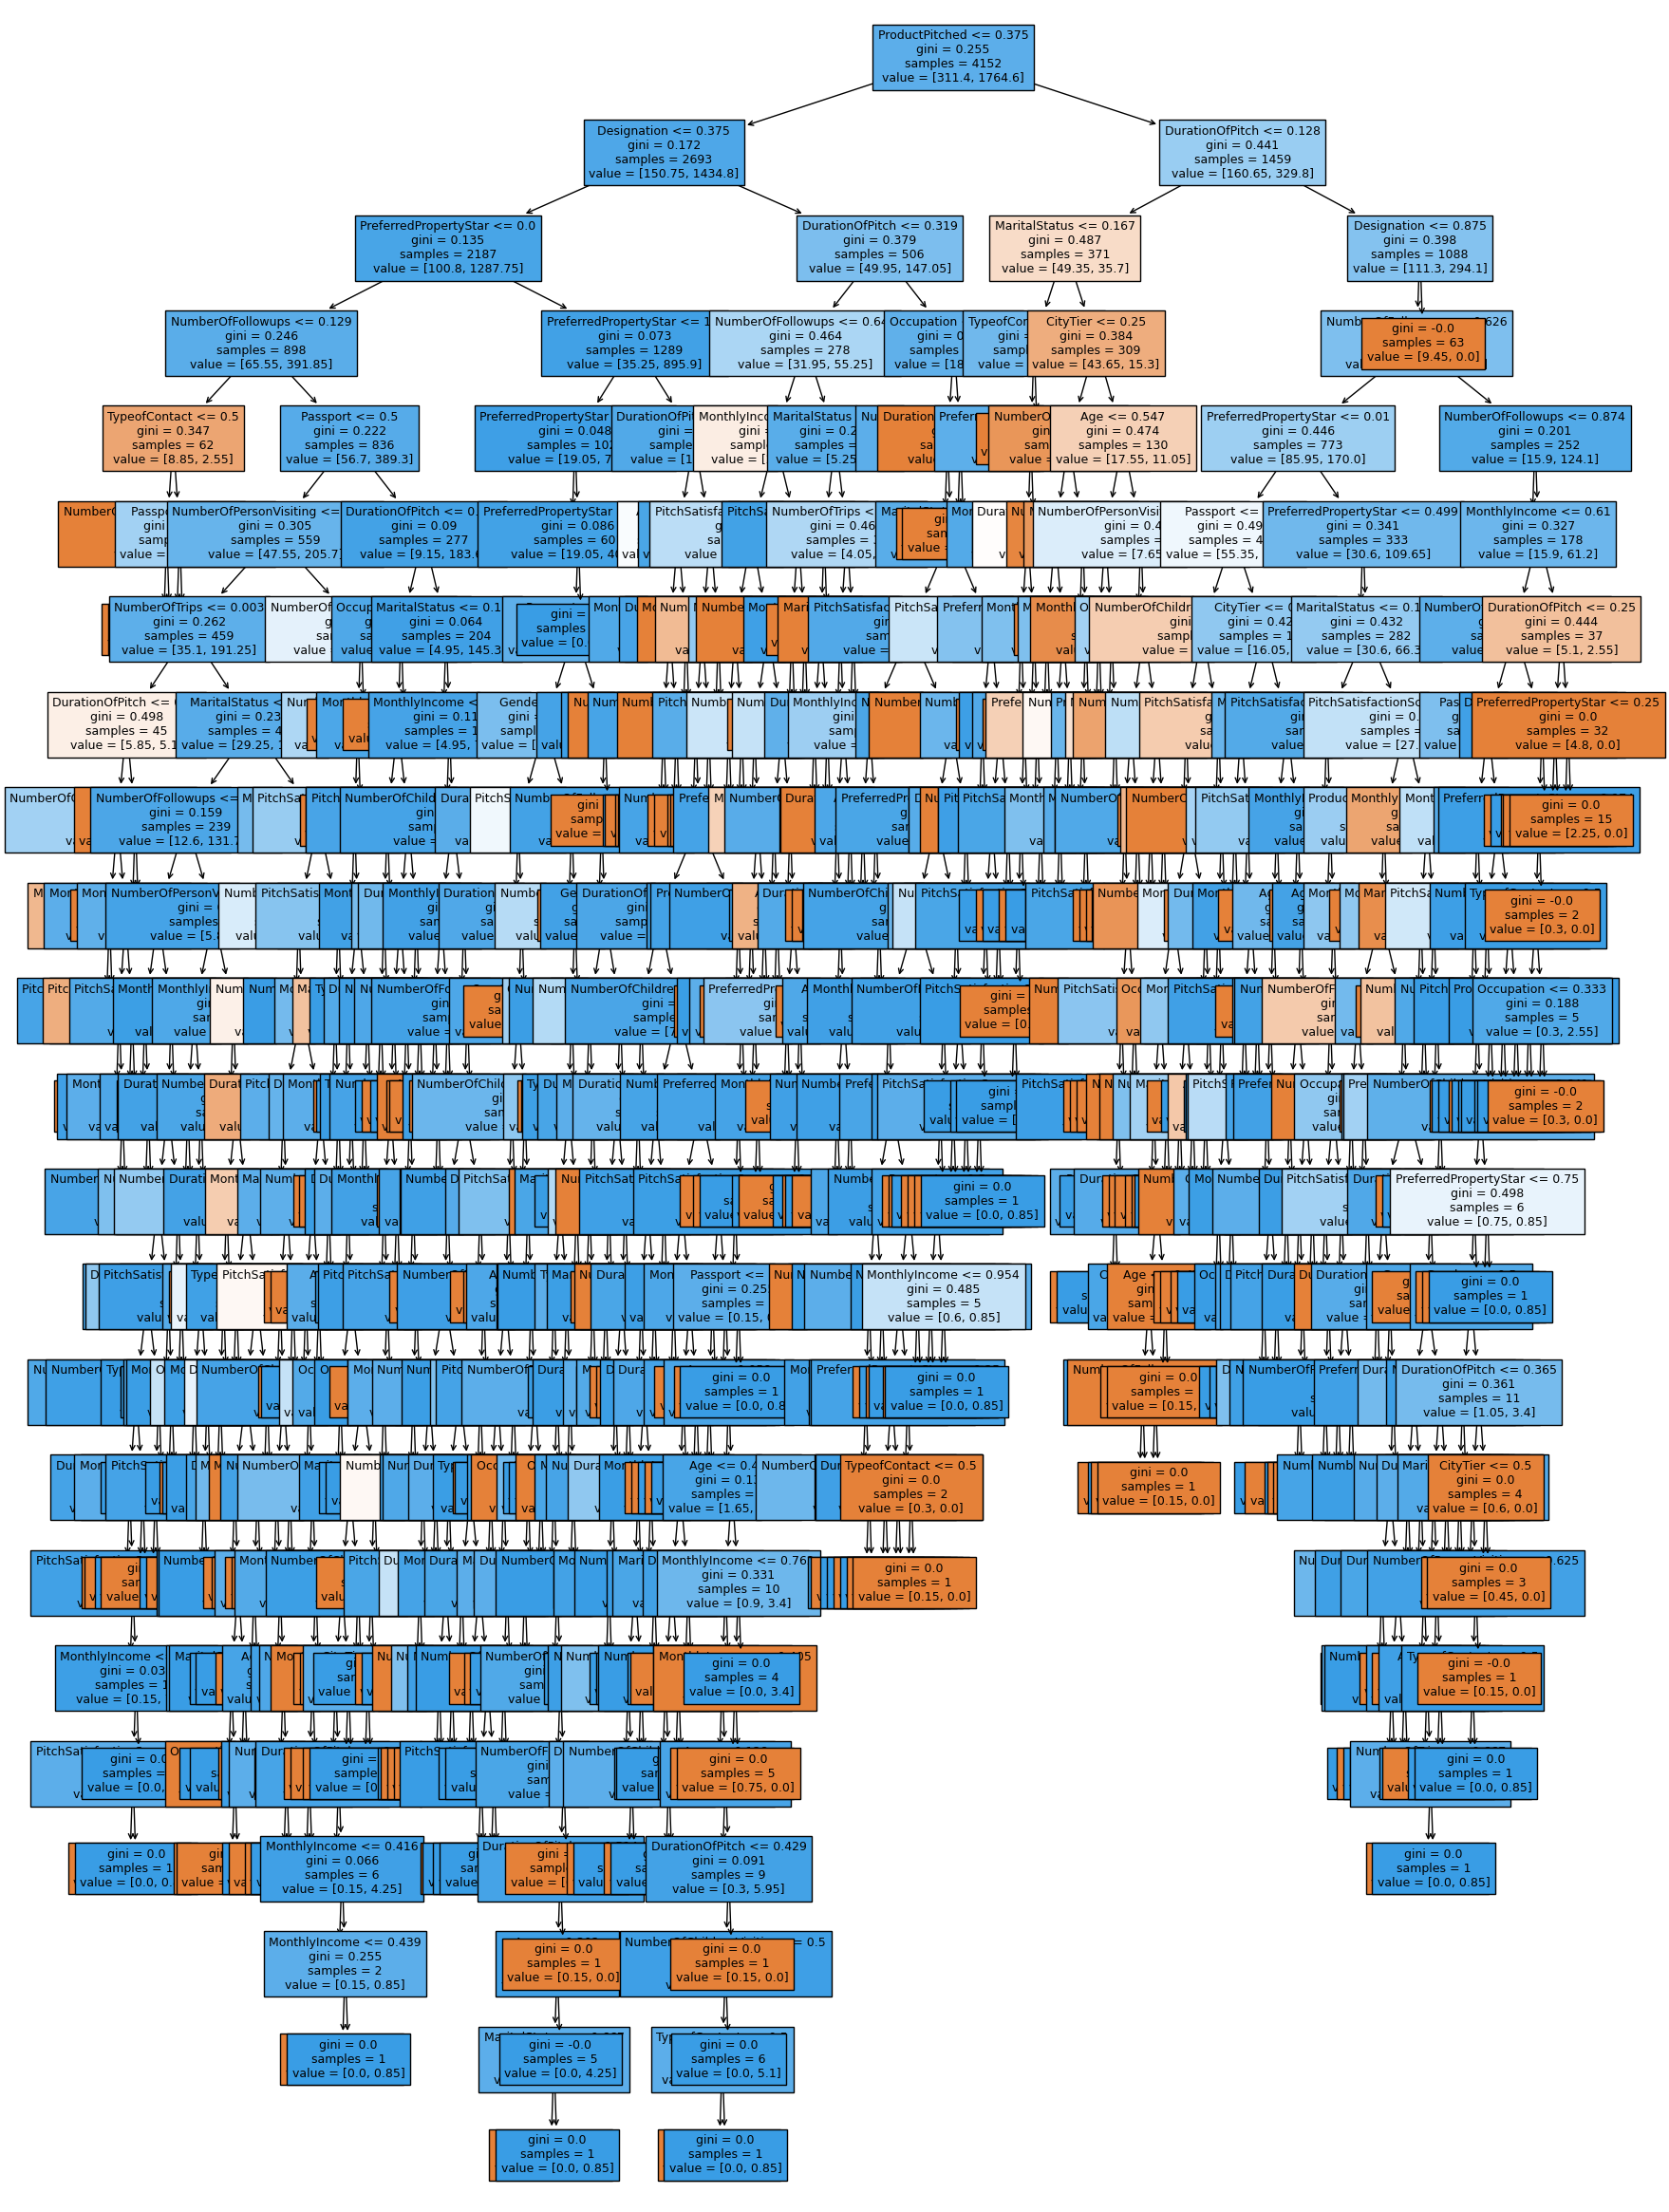

In [25]:
# plot the decision tree
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    dtc,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)

plt.show()

#### Draw the confusion matrix

In [26]:
def draw_matrix(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()

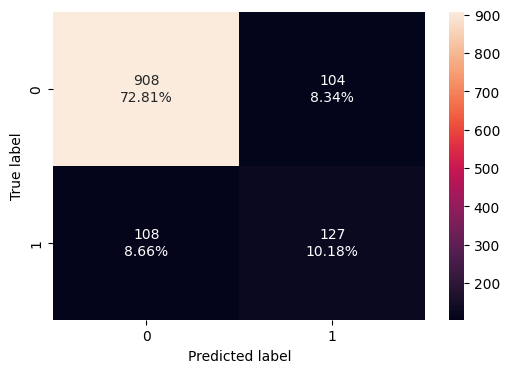

In [29]:
# use draw_matrix function
draw_matrix(dtc, X_val, y_val)

#### Check the important variables

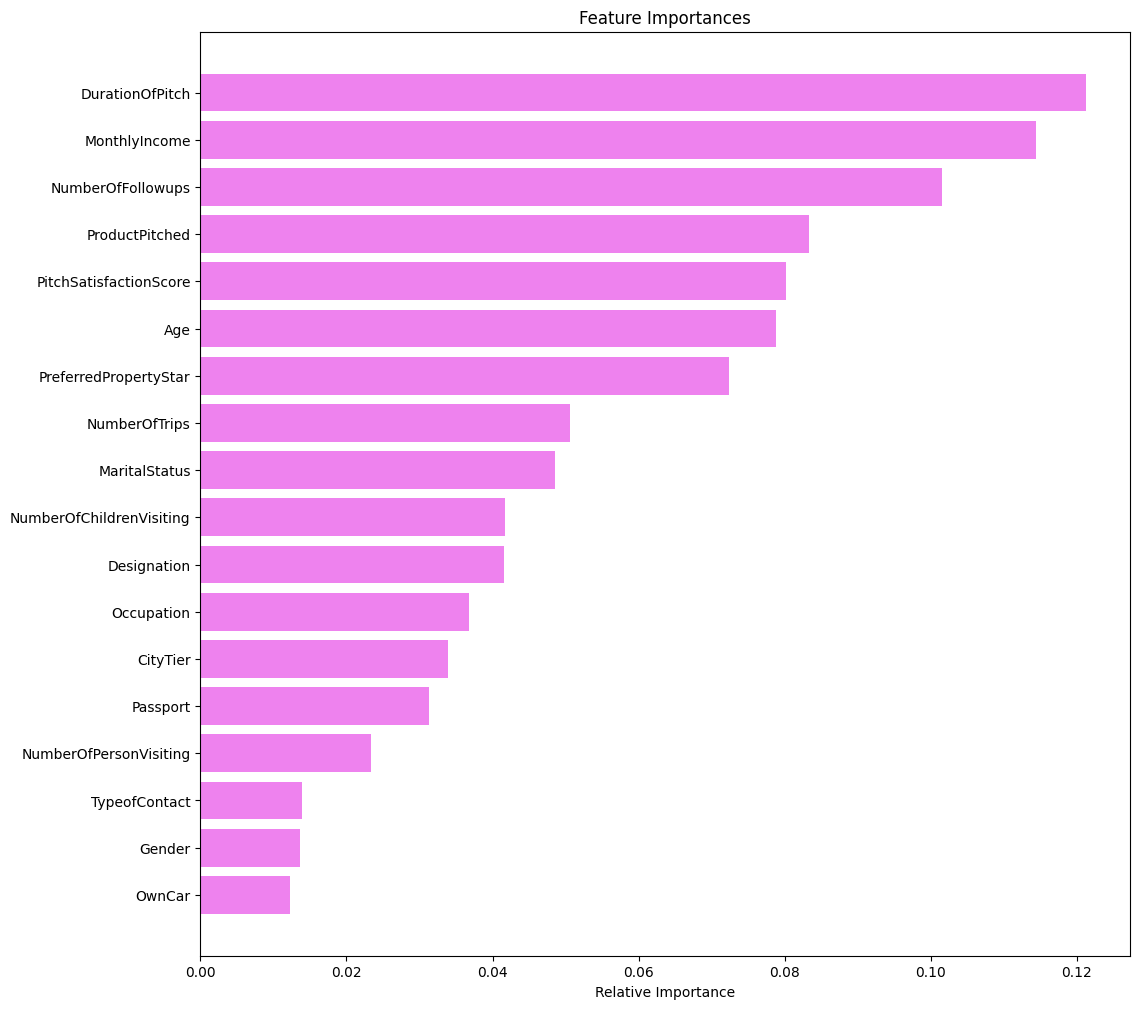

In [30]:
# plot a horizontal bar graph
importances = dtc.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations:**

1. The model tends to over fit the training set.
2. F1 Score for testing set is 0.545.
3. DurationOfPitch, MonthlyIncome, NumberOfFollowups, ProductPitched are most important variables.
4. It is difficult to read and understand the tree when drawn.
5. Since the model over fits the training set, we will use GridSearchCV to find the optimum parameters values and hypertine the Decistion Tree Classifier

#### Hypertuned Decision Tree Classifier

In [31]:
# choose the type of classifier. 
dtc1 = DecisionTreeClassifier(random_state=1,class_weight = {0:.15,1:.85}) #adding classweights 

# defining the Hyperparameters
parameters = {"max_depth": np.arange(10,60,10), 
            "criterion": ["gini","entropy"],
            "min_samples_leaf": [ 2, 5, 7, 10],
            "max_leaf_nodes" : [3, 5, 10,15],}

# type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# run the grid search with the above parameters
grid_obj = GridSearchCV(dtc1, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# set to the best combination of parameters
dtcht = grid_obj.best_estimator_

# fit the best algorithm to the data. 
dtcht.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, max_depth=10,
                       max_leaf_nodes=15, min_samples_leaf=7, random_state=1)

#### Visualise the Tree


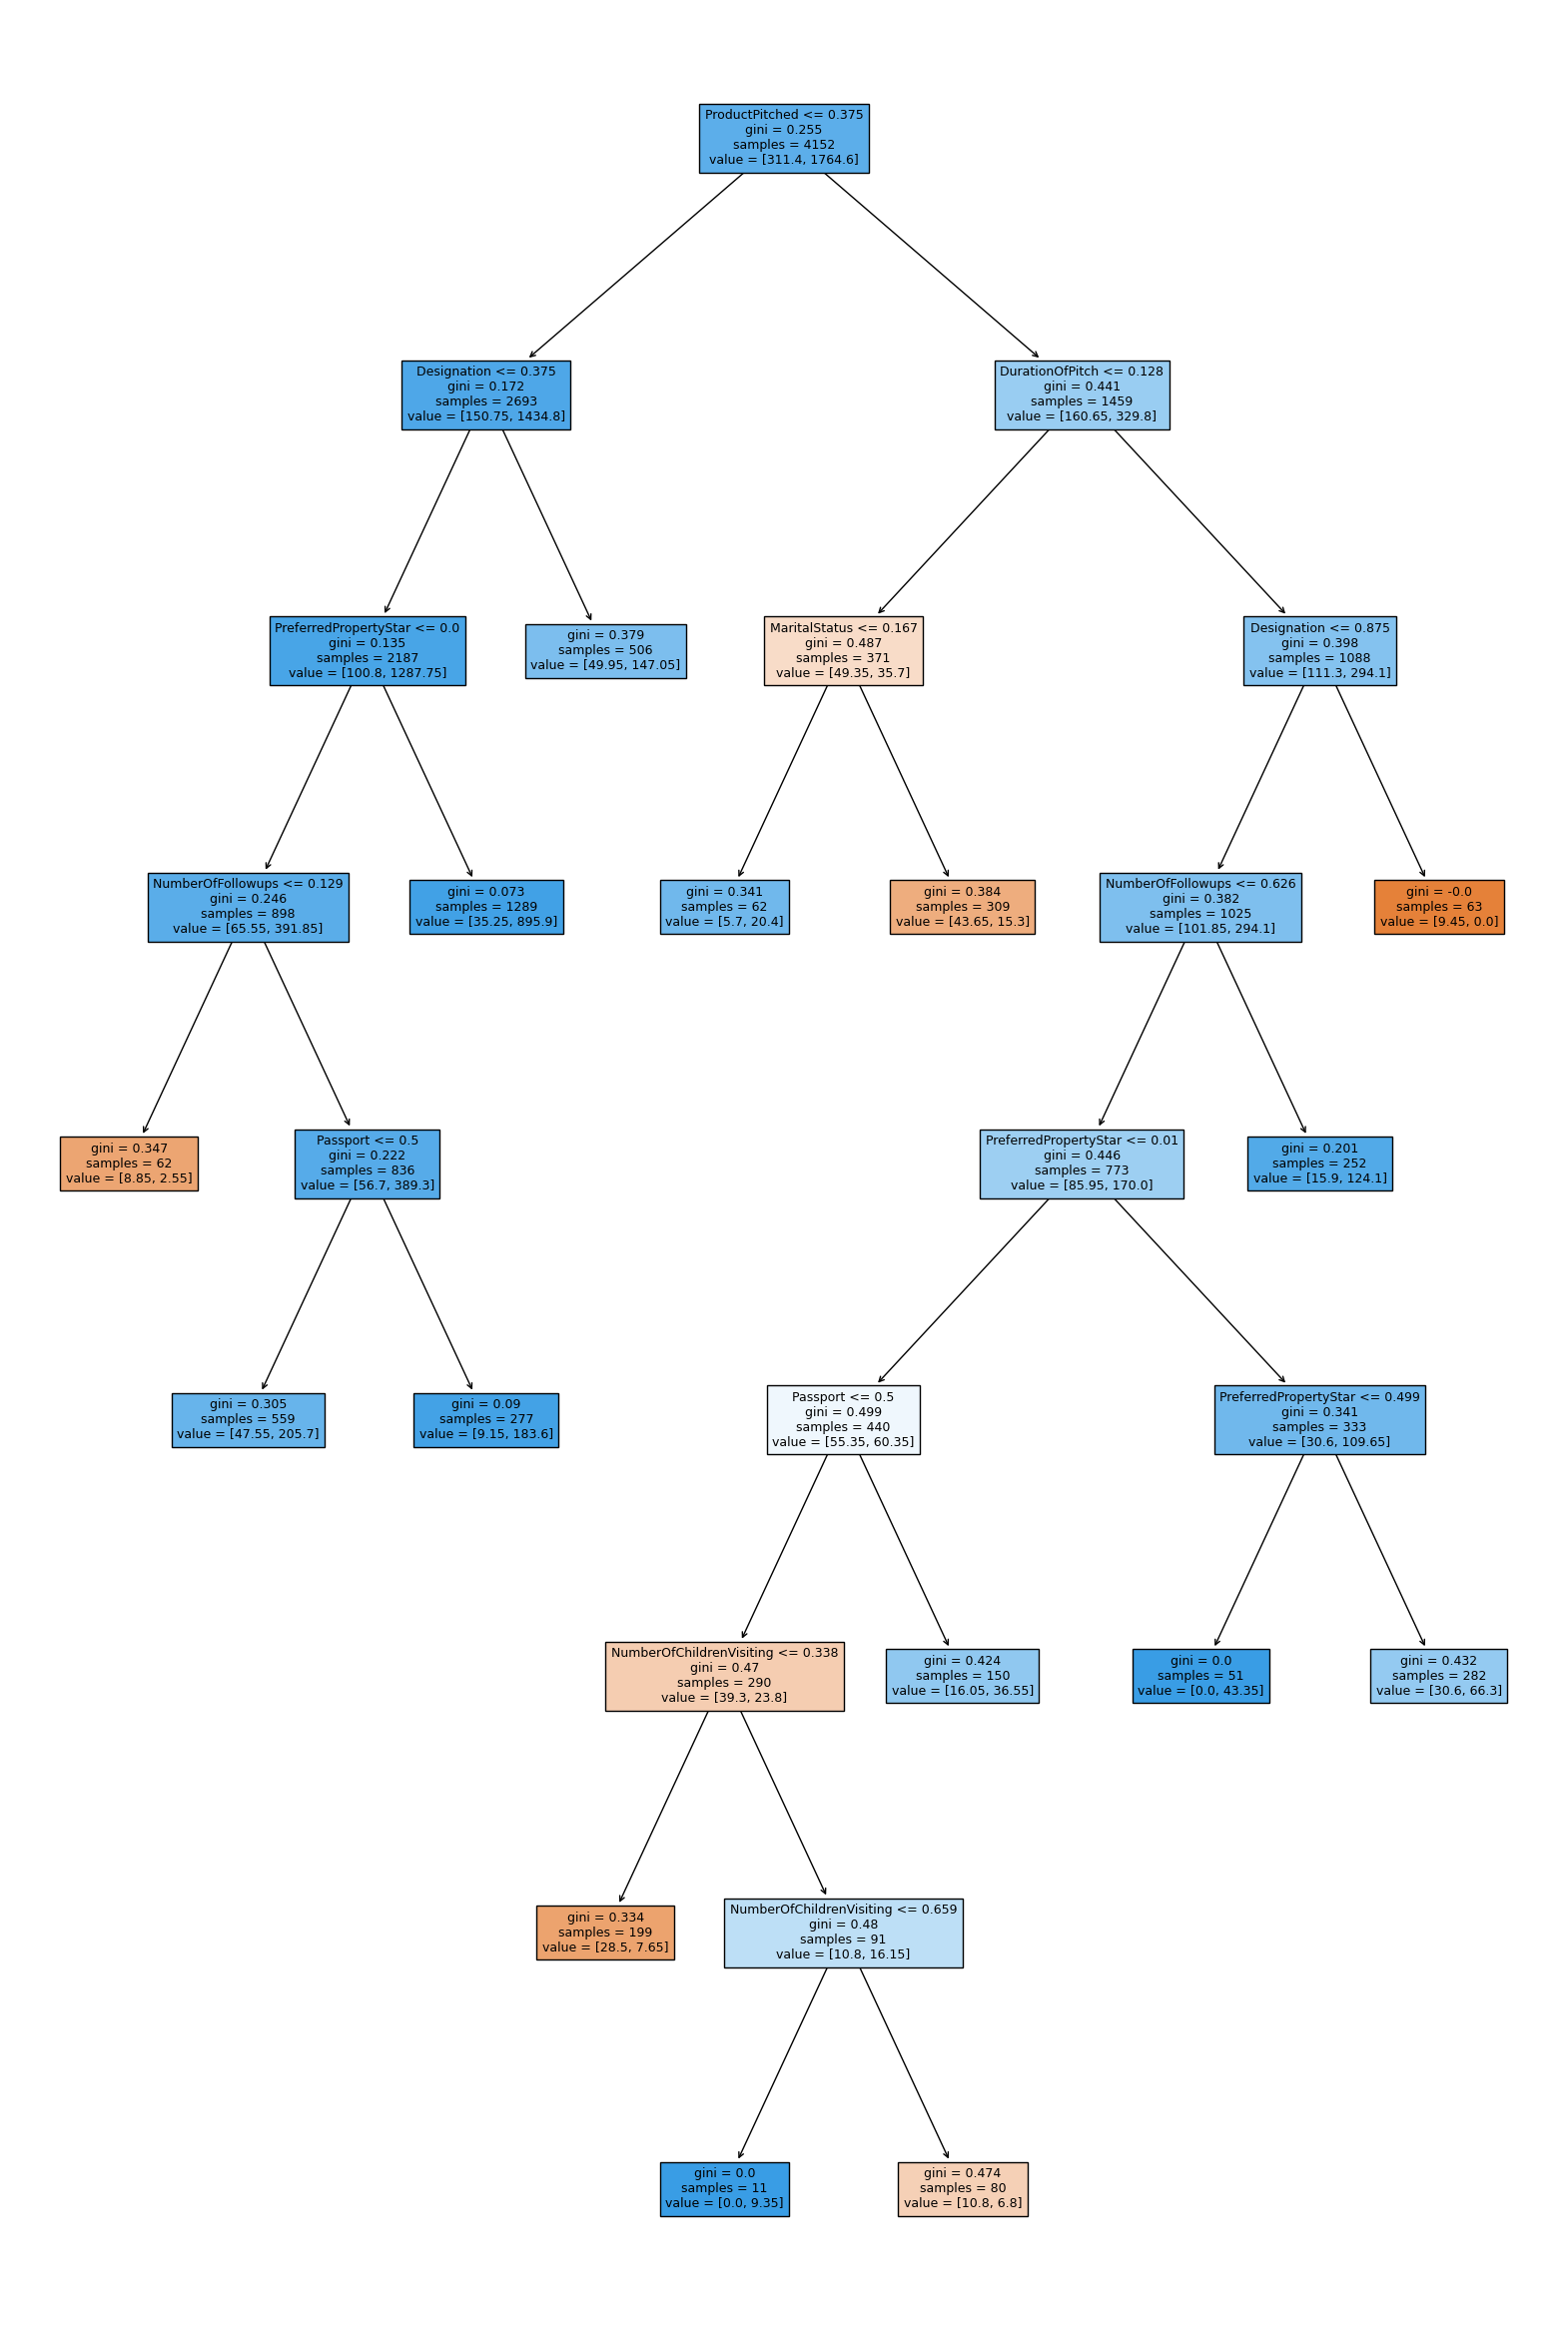

In [32]:
# plot the decision tree
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    dtcht,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)

plt.show()

#### Check the scores


In [33]:
# check the scores on Training and Testing Datasets
dtcht_scores = get_metrics_score(dtcht)

Accuracy on training set :  0.6534200385356455
Accuracy on test set :  0.4482758620689655
Recall on training set :  0.9816955684007708
Recall on test set :  0.8936170212765957
Precision on training set :  0.5926141320151207
Precision on test set :  0.24054982817869416
F1 on training set :  0.7390752493200363
F1 on test set :  0.37906137184115524


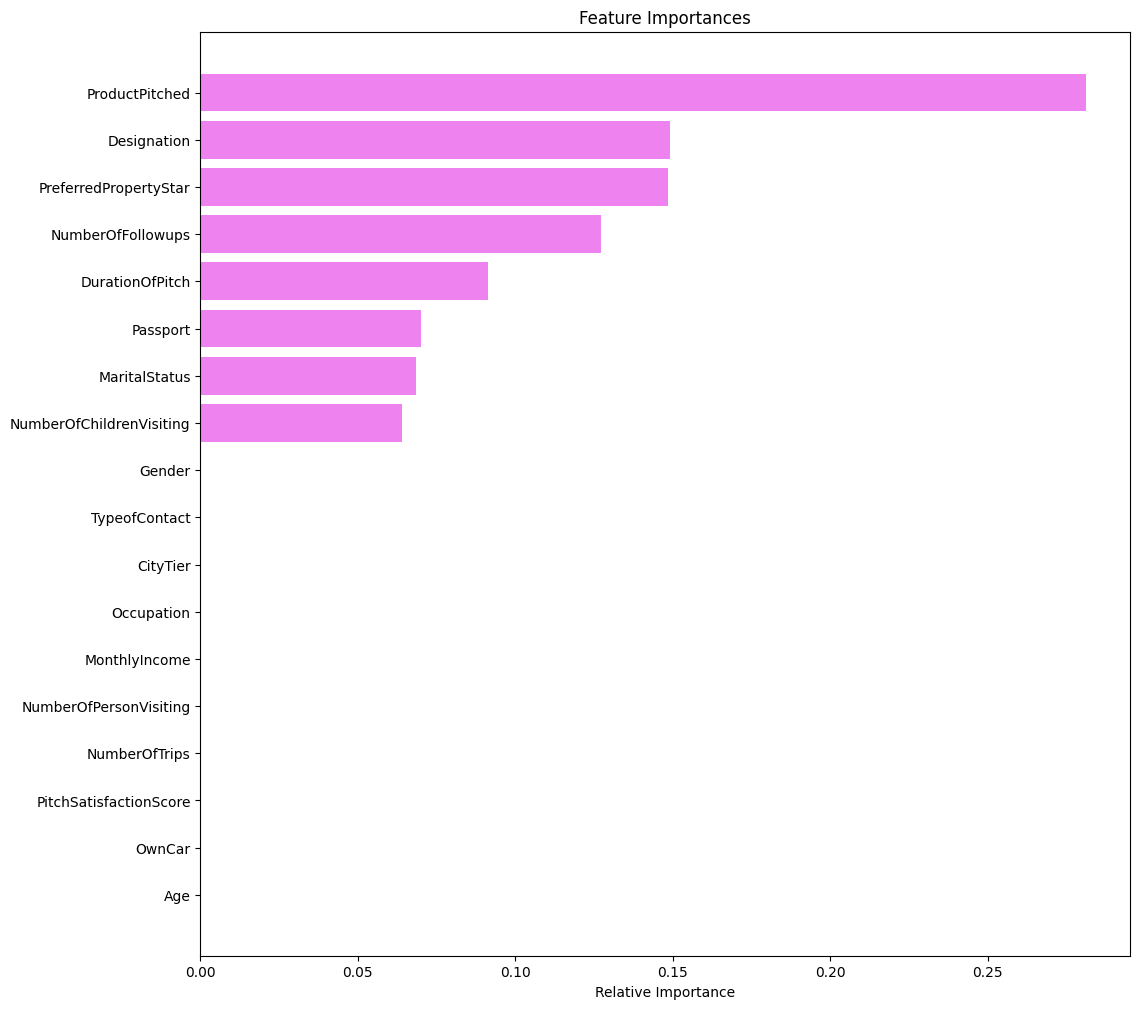

In [34]:
# plot a horizontal bar graph
importances = dtcht.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Bagging Classifier

Accuracy on training set :  0.9947013487475915
Accuracy on test set :  0.8612670408981555
Recall on training set :  0.9903660886319846
Recall on test set :  0.502127659574468
Precision on training set :  0.9990281827016521
Precision on test set :  0.6781609195402298
F1 on training set :  0.9946782776971456
F1 on test set :  0.5770171149144253


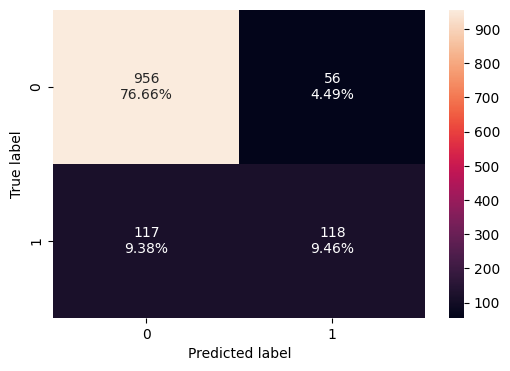

In [37]:
# baggingClassifier
bgc = BaggingClassifier(random_state=1)

# fit the model on training dataset
bgc.fit(X_train, y_train)

# check the scores on Training and Testing Datasets
bgc_score = get_metrics_score(bgc)

# use draw_matrix function
draw_matrix(bgc, X_val, y_val)

In [6]:
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import learning_curve, cross_val_score
# preprocessor = make_pipeline(RobustScaler())

# PCAPipeline = make_pipeline(preprocessor, PCA(n_components=3,random_state=42))

RandomPipeline = make_pipeline(RandomForestClassifier(random_state=42))
AdaPipeline = make_pipeline(AdaBoostClassifier(random_state=42))
SVMPipeline = make_pipeline(SVC(random_state=42,probability=True))
KNNPipeline = make_pipeline(KNeighborsClassifier())
LRPipeline = make_pipeline(LogisticRegression(solver='sag',random_state=42))
XGBPipeline = make_pipeline(XGBClassifier())

In [7]:
dict_of_models = {'RandomForest': RandomPipeline,
'AdaBoost': AdaPipeline,
'SVM': SVMPipeline,
'KNN': KNNPipeline,
'LR': LRPipeline,
'XGboost':XGBPipeline}

def evaluation(model):
    # calculating the probabilities
    y_pred_proba = model.predict_proba(X_val)

    # finding the predicted valued
    y_pred = np.argmax(y_pred_proba,axis=1)
    print('Accuracy = ', accuracy_score(y_val, y_pred))
    print('-')
    print(confusion_matrix(y_val,y_pred))
    print('-')
    print(classification_report(y_val,y_pred))
    print('-')
    
    N, train_score, test_score = learning_curve(model, X_train, y_train, 
                                               cv=5, scoring='f1', 
                                               train_sizes=np.linspace(0.1,1,10))
    plt.figure(figsize=(5,5))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, test_score.mean(axis=1), label='validation score')
    plt.legend()
    plt.show()

sns.set(font_scale = 1)
for name, model in dict_of_models.items():
    print('---------------------------------')
    print(name)
    model.fit(X_train,y_train)
    evaluation(model)


---------------------------------
RandomForest
Accuracy =  0.8789093825180433
-
[[974  38]
 [113 122]]
-
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1012
           1       0.76      0.52      0.62       235

    accuracy                           0.88      1247
   macro avg       0.83      0.74      0.77      1247
weighted avg       0.87      0.88      0.87      1247

-


/config/workspace/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1599: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/config/workspace/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1599: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/config/workspace/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1599: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/config/workspace/venv